# Visualize PMP mean climate results: Comparing user model with CMIP6

In this document, you will visualize PMP's mean climate results for your own model, together with CMIP6, to compare performace. You will create following plots.
- Portrait plot 
- Parallel coordinate plot
- Box plot
- Taylor Diagram

Written by Jiwoo Lee (LLNL/PCMDI), with contribution from Ana Ordonez (LLNL/PCMDI) and John Krasting (NOAA/GFDL)

Last update: May 2022

## Contents

1. [Read data from JSON files](#read)
  - 1.1 [Download PMP output JSON files for CMIP models](#download)
  - 1.2 [Provide PMP results for the user's model](#userinput)
  - 1.3 [Extract data from JSON files](#extract)
  - 1.4 [Combine your PMP output with CMIP results](#combine)
  - 1.5 [Normalize each column by its median for portrait plot](#normalize)
2. [Portrait Plot](#portrait)
3. [Parallel Coordinate Plot](#parallel)
4. [Box plots](#box)
5. [Taylor Diagram](#taylor)
  - 5.1 [Identify all models](#taylor_all)
  - 5.2 [Highlight user's model](#taylor_user)

## 1. Read data from JSON files <a name="read"></a>

Input data for portrait plot is expected as a set a (stacked or list of) 2-d numpy array(s) with list of strings for x and y axes labels. 

### 1.1 Download PMP output JSON files for CMIP models <a name="download"></a>

In [1]:
import glob
import os
import numpy as np
import requests
from pcmdi_metrics.graphics import download_archived_results

PMP output files downloadable from the [PMP results archive](https://github.com/PCMDI/pcmdi_metrics_results_archive).

In [2]:
vars = ['pr', 'prw', 'psl', 'rlds', 'rltcre', 'rlus', 'rlut', 'rlutcs', 'rsds', 'rsdscs', 'rsdt', 'rstcre', 'rsut', 'rsutcs', 'sfcWind', 
        'ta-200', 'ta-850', 'tas', 'tauu', 'ts', 'ua-200', 'ua-850', 'va-200', 'va-850', 'zg-500']

mip = "cmip6"
exp = "historical"
data_version = "v20210811"
json_dir = './json_files'

Provide directory path and filename in the [PMP results archive](https://github.com/PCMDI/pcmdi_metrics_results_archive).

In [3]:
for var in vars:
    path = "metrics_results/mean_climate/"+mip+"/"+exp+"/"+data_version+"/"+var+"."+mip+"."+exp+".regrid2.2p5x2p5."+data_version+".json"
    download_archived_results(path, json_dir)

Download completed: ./json_files/pr.cmip6.historical.regrid2.2p5x2p5.v20210811.json
Download completed: ./json_files/prw.cmip6.historical.regrid2.2p5x2p5.v20210811.json
Download completed: ./json_files/psl.cmip6.historical.regrid2.2p5x2p5.v20210811.json
Download completed: ./json_files/rlds.cmip6.historical.regrid2.2p5x2p5.v20210811.json
Download completed: ./json_files/rltcre.cmip6.historical.regrid2.2p5x2p5.v20210811.json
Download completed: ./json_files/rlus.cmip6.historical.regrid2.2p5x2p5.v20210811.json
Download completed: ./json_files/rlut.cmip6.historical.regrid2.2p5x2p5.v20210811.json
Download completed: ./json_files/rlutcs.cmip6.historical.regrid2.2p5x2p5.v20210811.json
Download completed: ./json_files/rsds.cmip6.historical.regrid2.2p5x2p5.v20210811.json
Download completed: ./json_files/rsdscs.cmip6.historical.regrid2.2p5x2p5.v20210811.json
Download completed: ./json_files/rsdt.cmip6.historical.regrid2.2p5x2p5.v20210811.json
Download completed: ./json_files/rstcre.cmip6.histor

Check JSON files

In [4]:
json_list = sorted(glob.glob(os.path.join(json_dir, '*' + mip + '*' + data_version + '.json')))
for json_file in json_list:
    print(json_file.split('/')[-1])

pr.cmip6.historical.regrid2.2p5x2p5.v20210811.json
prw.cmip6.historical.regrid2.2p5x2p5.v20210811.json
psl.cmip6.historical.regrid2.2p5x2p5.v20210811.json
rlds.cmip6.historical.regrid2.2p5x2p5.v20210811.json
rltcre.cmip6.historical.regrid2.2p5x2p5.v20210811.json
rlus.cmip6.historical.regrid2.2p5x2p5.v20210811.json
rlut.cmip6.historical.regrid2.2p5x2p5.v20210811.json
rlutcs.cmip6.historical.regrid2.2p5x2p5.v20210811.json
rsds.cmip6.historical.regrid2.2p5x2p5.v20210811.json
rsdscs.cmip6.historical.regrid2.2p5x2p5.v20210811.json
rsdt.cmip6.historical.regrid2.2p5x2p5.v20210811.json
rstcre.cmip6.historical.regrid2.2p5x2p5.v20210811.json
rsut.cmip6.historical.regrid2.2p5x2p5.v20210811.json
rsutcs.cmip6.historical.regrid2.2p5x2p5.v20210811.json
sfcWind.cmip6.historical.regrid2.2p5x2p5.v20210811.json
ta-200.cmip6.historical.regrid2.2p5x2p5.v20210811.json
ta-850.cmip6.historical.regrid2.2p5x2p5.v20210811.json
tas.cmip6.historical.regrid2.2p5x2p5.v20210811.json
tauu.cmip6.historical.regrid2.2p5x

### 1.2 Provide PMP results for the user's model <a name="userinput"></a>

In [5]:
json_dir_test = './json_files_test_case'

In [6]:
for var in vars:
    print(var)
    path = "test_case/mean_climate/my_model."+var+".regrid2.2p5x2p5.json"
    download_archived_results(path, json_dir_test)

pr
Download completed: ./json_files_test_case/my_model.pr.regrid2.2p5x2p5.json
prw
test_case/mean_climate/my_model.prw.regrid2.2p5x2p5.json not exist in  https://github.com/PCMDI/pcmdi_metrics_results_archive/tree/main/
psl
Download completed: ./json_files_test_case/my_model.psl.regrid2.2p5x2p5.json
rlds
Download completed: ./json_files_test_case/my_model.rlds.regrid2.2p5x2p5.json
rltcre
Download completed: ./json_files_test_case/my_model.rltcre.regrid2.2p5x2p5.json
rlus
Download completed: ./json_files_test_case/my_model.rlus.regrid2.2p5x2p5.json
rlut
Download completed: ./json_files_test_case/my_model.rlut.regrid2.2p5x2p5.json
rlutcs
Download completed: ./json_files_test_case/my_model.rlutcs.regrid2.2p5x2p5.json
rsds
Download completed: ./json_files_test_case/my_model.rsds.regrid2.2p5x2p5.json
rsdscs
test_case/mean_climate/my_model.rsdscs.regrid2.2p5x2p5.json not exist in  https://github.com/PCMDI/pcmdi_metrics_results_archive/tree/main/
rsdt
Download completed: ./json_files_test_cas

In [7]:
json_list_test = sorted(glob.glob(os.path.join(json_dir_test, '*.json')))
for json_file in json_list_test:
    print(json_file.split('/')[-1])

my_model.pr.regrid2.2p5x2p5.json
my_model.psl.regrid2.2p5x2p5.json
my_model.rlds.regrid2.2p5x2p5.json
my_model.rltcre.regrid2.2p5x2p5.json
my_model.rlus.regrid2.2p5x2p5.json
my_model.rlut.regrid2.2p5x2p5.json
my_model.rlutcs.regrid2.2p5x2p5.json
my_model.rsds.regrid2.2p5x2p5.json
my_model.rsdt.regrid2.2p5x2p5.json
my_model.rstcre.regrid2.2p5x2p5.json
my_model.rsut.regrid2.2p5x2p5.json
my_model.rsutcs.regrid2.2p5x2p5.json
my_model.sfcWind.regrid2.2p5x2p5.json
my_model.ta-200.regrid2.2p5x2p5.json
my_model.ta-850.regrid2.2p5x2p5.json
my_model.tas.regrid2.2p5x2p5.json
my_model.ts.regrid2.2p5x2p5.json
my_model.ua-200.regrid2.2p5x2p5.json
my_model.ua-850.regrid2.2p5x2p5.json
my_model.va-200.regrid2.2p5x2p5.json
my_model.va-850.regrid2.2p5x2p5.json
my_model.zg-500.regrid2.2p5x2p5.json


### 1.3 Extract data from JSON files <a name="extract"></a>

Use `Metrics` class (that use `read_mean_clim_json_files` function underneath) to extract data from the above JSON files.

#### Parameters
- `json_list`: list of string, where each element is for path/file for PMP output JSON files

#### Returned object includes
- `df_dict`: dictionary that has `[stat][season][region]` hierarchy structure storing pandas dataframe for metric numbers (Rows: models, Columns: variables (i.e., 2d array)
- `var_list`: list of string, all variables from JSON files
- `var_unit_list`: list of string, all variables and its units from JSON files
- `var_ref_dict`: dictonary for reference dataset used for each variable
- `regions`: list of string, regions
- `stats`: list of string, statistics

In [8]:
from pcmdi_metrics.graphics import Metrics

In [9]:
# existing library of mean climate metrics downloaded
library = Metrics(json_list)

In [10]:
# new test case
test_case = Metrics(json_list_test)

### 1.4 Combine your PMP output with CMIP results <a name="combine"></a>

In [11]:
# merged
combined = library.merge(test_case)

In [12]:
df_dict = combined.df_dict
var_list = combined.var_list
var_unit_list = combined.var_unit_list
var_ref_dict = combined.var_ref_dict
regions = combined.regions
stats = combined.stats

#### Check loaded data

In [13]:
print('var_list:', sorted(var_list))
print('var_unit_list:', sorted(var_unit_list))
print('var_ref_dict:', var_ref_dict)

var_list: ['pr', 'prw', 'psl', 'rlds', 'rltcre', 'rlus', 'rlut', 'rlutcs', 'rsds', 'rsdscs', 'rsdt', 'rstcre', 'rsut', 'rsutcs', 'sfcWind', 'ta-200', 'ta-850', 'tas', 'tauu', 'ts', 'ua-200', 'ua-850', 'va-200', 'va-850', 'zg-500']
var_unit_list: ['pr [N/A]', 'pr [kg m-2 s-1]', 'prw [N/A]', 'psl [N/A]', 'psl [Pa]', 'rlds [N/A]', 'rlds [W m-2]', 'rltcre [W m-2]', 'rlus [N/A]', 'rlus [W m-2]', 'rlut [N/A]', 'rlut [W m-2]', 'rlutcs [N/A]', 'rlutcs [W m-2]', 'rsds [N/A]', 'rsds [W m-2]', 'rsdscs [N/A]', 'rsdt [N/A]', 'rsdt [W m-2]', 'rstcre [W m-2]', 'rsut [N/A]', 'rsut [W m-2]', 'rsutcs [N/A]', 'rsutcs [W m-2]', 'sfcWind [N/A]', 'sfcWind [m s-1]', 'ta-200 [K]', 'ta-200 [N/A]', 'ta-850 [K]', 'ta-850 [N/A]', 'tas [K]', 'tas [N/A]', 'tauu [N/A]', 'ts [K]', 'ts [N/A]', 'ua-200 [N/A]', 'ua-200 [m s-1]', 'ua-850 [N/A]', 'ua-850 [m s-1]', 'va-200 [N/A]', 'va-200 [m s-1]', 'va-850 [N/A]', 'va-850 [m s-1]', 'zg-500 [N/A]', 'zg-500 [m]']
var_ref_dict: {'pr': 'GPCP-2-3', 'prw': 'REMSS-PRW-v07r01', 'p

In pandas dataframe, you will see your model is now included in the last row, as below.

In [14]:
df_dict['rms_xy']['djf']['global']

,model,run,model_run,pr,prw,psl,rlds,rltcre,rlus,rlut,...,ta-200,ta-850,tas,tauu,ts,ua-200,ua-850,va-200,va-850,zg-500
0,ACCESS-CM2,r1i1p1,ACCESS-CM2_r1i1p1,1.661,139.039,245.952,11.552,8.519,10.560,10.991,...,2.717,1.495,2.508,0.040,2.770,4.174,1.421,1.689,0.799,26.053
1,ACCESS-ESM1-5,r1i1p1,ACCESS-ESM1-5_r1i1p1,1.739,139.068,215.795,10.553,7.358,10.352,10.875,...,2.551,1.335,2.106,0.035,2.250,3.305,1.408,1.804,0.859,25.470
2,AWI-CM-1-1-MR,r1i1p1,AWI-CM-1-1-MR_r1i1p1,1.604,139.179,170.936,11.231,7.957,8.496,8.960,...,1.847,1.074,1.414,0.028,1.609,2.483,1.251,1.586,0.711,16.738
3,AWI-ESM-1-1-LR,r1i1p1,AWI-ESM-1-1-LR_r1i1p1,1.937,139.199,201.589,14.743,8.935,12.495,11.630,...,3.966,2.224,2.039,0.034,2.317,3.835,1.684,2.241,1.024,NaN
4,BCC-CSM2-MR,r1i1p1,BCC-CSM2-MR_r1i1p1,1.700,139.251,237.180,13.025,7.370,11.014,9.984,...,NaN,NaN,2.669,0.034,2.585,NaN,NaN,NaN,NaN,NaN
5,BCC-ESM1,r1i1p1,BCC-ESM1_r1i1p1,1.631,139.152,237.973,14.469,8.423,12.970,12.763,...,4.343,2.055,3.211,0.038,3.188,4.673,1.849,2.119,1.118,NaN
6,CAMS-CSM1-0,r1i1p1,CAMS-CSM1-0_r1i1p1,1.721,139.513,182.945,19.644,8.397,14.631,11.507,...,NaN,NaN,3.462,NaN,3.858,NaN,NaN,NaN,NaN,NaN
7,CESM2,r1i1p1,CESM2_r1i1p1,1.234,139.212,210.704,11.026,6.979,9.611,7.908,...,2.057,1.309,1.483,0.089,1.800,3.433,1.377,1.973,0.800,NaN
8,CESM2-FV2,r1i1p1,CESM2-FV2_r1i1p1,1.397,139.161,242.138,12.376,7.835,10.690,8.740,...,3.026,1.987,1.892,0.090,2.142,4.017,2.061,2.204,0.988,NaN
9,CESM2-WACCM,r1i1p1,CESM2-WACCM_r1i1p1,1.203,139.166,205.141,10.544,6.761,9.166,7.680,...,NaN,NaN,1.462,0.088,1.750,3.131,1.481,1.761,0.787,NaN


#### Customize variables to show (optional)

In [15]:
# customize variables shown in portrait plot
#var_list = ["pr", "psl", "rltcre", "rlut", "rstcre", "rsut", "ta-200", "ta-850", "tas", "ts",
#            "ua-200", "ua-850", "va-200", "va-850", "zg-500"]
var_list = sorted(var_list)
var_list.remove('sfcWind')  # temporarliy removed sfc wind due to problem in observation

In [16]:
# Simple re-order variables
if 'zg-500' in var_list and 'sfcWind' in var_list:
    var_list.remove('zg-500')
    idx_sfcWind = var_list.index('sfcWind')
    var_list.insert(idx_sfcWind+1, 'zg-500')

print("var_list:", var_list)

var_list: ['pr', 'prw', 'psl', 'rlds', 'rltcre', 'rlus', 'rlut', 'rlutcs', 'rsds', 'rsdscs', 'rsdt', 'rstcre', 'rsut', 'rsutcs', 'ta-200', 'ta-850', 'tas', 'tauu', 'ts', 'ua-200', 'ua-850', 'va-200', 'va-850', 'zg-500']


#### Prepare input for portrait plot plotting function

In [17]:
data_djf = df_dict['rms_xy']['djf']['global'][var_list].to_numpy()
data_mam = df_dict['rms_xy']['mam']['global'][var_list].to_numpy()
data_jja = df_dict['rms_xy']['jja']['global'][var_list].to_numpy()
data_son = df_dict['rms_xy']['son']['global'][var_list].to_numpy()
model_names = df_dict['rms_xyt']['ann']['global']['model'].tolist()
data_all = np.stack([data_djf, data_mam, data_jja, data_son])
print('data.shape:', data_all.shape)
print('len(var_list): ', len(var_list))
print('len(model_names): ', len(model_names))

xaxis_labels = var_list
yaxis_labels = model_names

data.shape: (4, 46, 24)
len(var_list):  24
len(model_names):  46


### 1.5 Normalize each column by its median for portrait plot <a name="normalize"></a>

Use `normalize_by_median` function.

#### Parameters
- `data`: 2d numpy array
- `axis`: 0 (normalize each column) or 1 (normalize each row), default=0 

#### Return
- `data_nor`: 2d numpy array

In [18]:
from pcmdi_metrics.graphics import normalize_by_median

data_djf_nor = normalize_by_median(data_djf)
data_mam_nor = normalize_by_median(data_mam)
data_jja_nor = normalize_by_median(data_jja)
data_son_nor = normalize_by_median(data_son)

In [19]:
data_all_nor = np.stack([data_djf_nor, data_mam_nor, data_jja_nor, data_son_nor])
data_all_nor.shape

(4, 46, 24)

## 2. Portrait Plot <a name="portrait"></a>

Using Matplotlib-based PMP Visualization Function

In [20]:
from pcmdi_metrics.graphics import portrait_plot

<p id="parameters"></p>

Parameters
----------
- `data`: 2d numpy array, a list of 2d numpy arrays, or a 3d numpy array (i.e. stacked 2d numpy arrays)
- `xaxis_labels`: list of strings, labels for xaixs. Number of list element must consistent to x-axis, or 0 (empty list) to turn off xaxis tick labels
- `yaxis_labels`: list of strings, labels for yaxis. Number of list element must consistent to y-axis, or 0 (empty list) to turn off yaxis tick labels
- `fig`: [`matplotlib.figure`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html) instance to which the portrait plot is plotted.  If not provided, use current axes or create a new one.  Optional.
- `ax`: [`matplotlib.axes.Axes`](https://matplotlib.org/stable/api/axes_api.html) instance to which the portrait plot is plotted.  If not provided, use current axes or create a new one.  Optional.
- `annotate`: bool, default=False, add annotating text if true, but work only for heatmap style map (i.e., no triangles)
- `annotate_data`: 2d numpy array, default=None. If None, the image's data is used.  Optional. 
- `annotate_fontsize`: number (int/float), default=15. Font size for annotation
- `annotate_format`: format for annotate value, default="{x:.2f}"
- `figsize`: tuple of two numbers (width, height), default=(12, 10), figure size in inches
- `vrange`: tuple of two numbers, range of value for colorbar.  Optional.
- `xaxis_fontsize`: number, default=15, font size for xaxis tick labels
- `yaxis_fontsize`: number, default=15, font size for yaxis tick labels
- `cmap`: string, default="RdBu_r", name of matplotlib colormap
- `cmap_bounds`: list of numbers.  If given, discrete colors are applied.  Optional.
- `cbar_label`: string, default=None, label for colorbar
- `cbar_label_fontsize`: number, default=15, font size for colorbar labels
- `cbar_tick_fontsize`: number, default=12, font size for colorbar tick labels
- `cbar_kw`: A dictionary with arguments to [`matplotlib.Figure.colorbar`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.colorbar.html).  Optional.
- `colorbar_off`: Trun off colorbar if True.  Optional.
- `missing_color`: color, default="grey", [`matplotlib.axes.Axes.set_facecolor`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_facecolor.html) parameter
- `invert_yaxis`: bool, default=True, place y=0 at top on the plot
- `box_as_square`: bool, default=False, make each box as square
- `legend_on`: bool, default=False, show legend (only for 2 or 4 triangles portrait plot)
- `legend_labels`: list of strings, legend labels for triangls
- `legend_box_xy`: tuple of numbers, position of legend box's upper-left corner (lower-left if `invert_yaxis=False`), in `axes` coordinate
- `legend_box_size`: number, size of legend box
- `legend_lw`: number, line width of legend, default=1
- `legend_fontsize`: number, font size for legend, default=14
- `logo_rect`: sequence of float. The dimensions [left, bottom, width, height] of the PMP logo. All quantities are in fractions of figure width and height.  Optional
- `logo_off`: bool, default=False, turn off PMP logo
- `debug`: bool, default=False, if true print more message when running that help debugging

Return
------
- `fig`: matplotlib component for figure
- `ax`: matplotlib component for axis
- `cbar`: matplotlib component for colorbar (not returned if colorbar_off=True)

### Portrait Plot with 4 Triangles (4 seasons)

- data order is clockwise from top: top, right, bottom, left

Text(0.5, 0.5, 'Example')

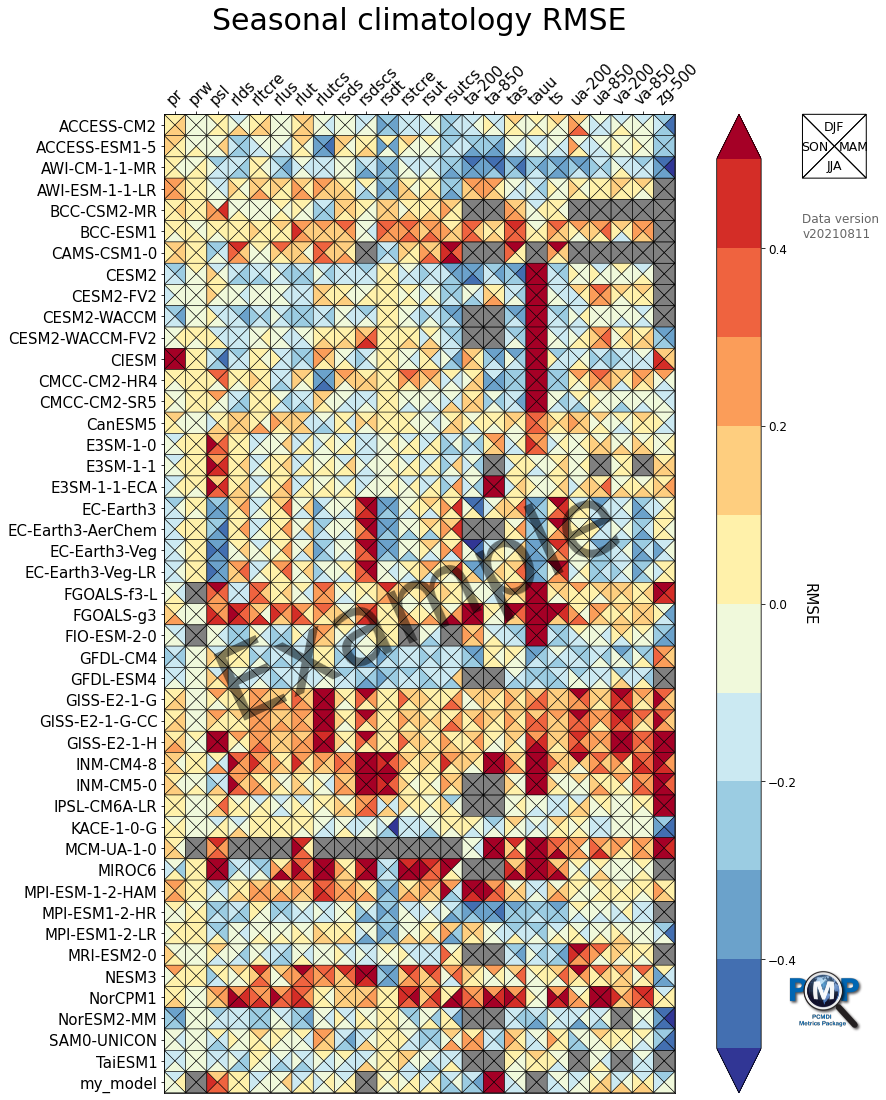

In [21]:
fig, ax, cbar = portrait_plot(data_all_nor,
                              xaxis_labels=xaxis_labels, 
                              yaxis_labels=yaxis_labels, 
                              cbar_label='RMSE',
                              box_as_square=True,
                              vrange=(-0.5, 0.5),
                              figsize=(15, 18),
                              cmap='RdYlBu_r',
                              cmap_bounds=[-0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5],
                              cbar_kw={"extend": "both"},
                              missing_color='grey',
                              legend_on=True,
                              legend_labels=['DJF', 'MAM', 'JJA', 'SON'],
                              legend_box_xy=(1.25, 1),
                              legend_box_size=3,
                              legend_lw=1,
                              legend_fontsize=12.5,
                              logo_rect = [0.85, 0.15, 0.07, 0.07]
                             )
ax.set_xticklabels(xaxis_labels, rotation=45, va='bottom', ha="left")

# Add title
ax.set_title("Seasonal climatology RMSE", fontsize=30, pad=30)

# Add data info
fig.text(1.25, 0.9, 'Data version\n'+data_version, transform=ax.transAxes,
         fontsize=12, color='black', alpha=0.6, ha='left', va='top',)

# Add Watermark
ax.text(0.5, 0.5, 'Example', transform=ax.transAxes,
        fontsize=100, color='black', alpha=0.5,
        ha='center', va='center', rotation='25')

In [22]:
# Save figure as an image file
fig.savefig('mean_clim_portrait_plot_4seasons_example_user_model.png', facecolor='w', bbox_inches='tight')

## 3. Parallel Coordinate Plot <a name="parallel"></a>

In [23]:
data = df_dict['rms_xyt']['ann']['global'][var_list].to_numpy()
model_names = df_dict['rms_xyt']['ann']['global']['model'].tolist()
#metric_names = ['\n['.join(var_unit.split(' [')) for var_unit in var_unit_list]
metric_names = var_list
model_highlights = ['my_model']
print('data.shape:', data.shape)
print('len(metric_names): ', len(metric_names))
print('len(model_names): ', len(model_names))

data.shape: (46, 24)
len(metric_names):  24
len(model_names):  46


In [24]:
units_all = 'prw [kg m-2], pr [mm d-1], psl [Pa], rlds [W m-2], rsdscs [W m-2], rltcre [W m-2], rlus [W m-2], rlut [W m-2], rlutcs [W m-2], rsds [W m-2], rsdt [W m-2], rstcre [W m-2], rsus [W m-2], rsut [W m-2], rsutcs [W m-2], sfcWind [m s-1], zg-500 [m], ta-200 [K], ta-850 [K], tas [K], ts [K], ua-200 [m s-1], ua-850 [m s-1], uas [m s-1], va-200 [m s-1], va-850 [m s-1], vas [m s-1], tauu [Pa]'
units_all.split(', ')
var_unit_list = [] 

for var in var_list:
    found = False
    for var_units in units_all.split(', '):
        tmp1 = var_units.split(' [')[0]
        #print(var, tmp1)
        if tmp1 == var:
            unit = '[' + var_units.split(' [')[1]
            var_unit_list.append(var + '\n' + unit)
            found = True
            break
    if found is False:
        print(var, 'not found')

print('var_unit_list:', var_unit_list)

metric_names = var_unit_list

var_unit_list: ['pr\n[mm d-1]', 'prw\n[kg m-2]', 'psl\n[Pa]', 'rlds\n[W m-2]', 'rltcre\n[W m-2]', 'rlus\n[W m-2]', 'rlut\n[W m-2]', 'rlutcs\n[W m-2]', 'rsds\n[W m-2]', 'rsdscs\n[W m-2]', 'rsdt\n[W m-2]', 'rstcre\n[W m-2]', 'rsut\n[W m-2]', 'rsutcs\n[W m-2]', 'ta-200\n[K]', 'ta-850\n[K]', 'tas\n[K]', 'tauu\n[Pa]', 'ts\n[K]', 'ua-200\n[m s-1]', 'ua-850\n[m s-1]', 'va-200\n[m s-1]', 'va-850\n[m s-1]', 'zg-500\n[m]']


In [25]:
df_dict['rms_xyt']['ann']['global'][var_list].columns

Index(['pr', 'prw', 'psl', 'rlds', 'rltcre', 'rlus', 'rlut', 'rlutcs', 'rsds',
       'rsdscs', 'rsdt', 'rstcre', 'rsut', 'rsutcs', 'ta-200', 'ta-850', 'tas',
       'tauu', 'ts', 'ua-200', 'ua-850', 'va-200', 'va-850', 'zg-500'],
      dtype='object')

### Use parallel coordinate plot function of PMP

In [26]:
from pcmdi_metrics.graphics import parallel_coordinate_plot

Parameters
----------
- `data`: 2-d numpy array for metrics
- `metric_names`: list, names of metrics for individual vertical axes (axis=1)
- `model_names`: list, name of models for markers/lines (axis=0)
- `model_highlights`: list, default=None, List of models to highlight as lines
- `fig`: `matplotlib.figure` instance to which the parallel coordinate plot is plotted.  If not provided, use current axes or create a new one.  Optional.
- `ax`: `matplotlib.axes.Axes` instance to which the parallel coordinate plot is plotted.  If not provided, use current axes or create a new one.  Optional.
- `figsize`: tuple (two numbers), default=(15,5), image size
- `show_boxplot`: bool, default=True, show box and wiskers plot
- `show_violin`: bool, default=True, show violin plot
- `title`: string, default=None, plot title
- `identify_all_models`: bool, default=True. Show and identify all models using markers
- `xtick_labelsize`: number, fontsize for x-axis tick labels (optional)
- `ytick_labelsize`: number, fontsize for x-axis tick labels (optional)
- `colormap`: string, default='viridis', matplotlib colormap
- `logo_rect`: sequence of float. The dimensions [left, bottom, width, height] of the new Axes. All quantities are in fractions of figure width and height.  Optional
- `logo_off`: bool, default=False, turn off PMP logo

Return
------
- `fig`: matplotlib component for figure
- `ax`: matplotlib component for axis

Passed a quick QC


Text(0.5, 0.5, 'Example')

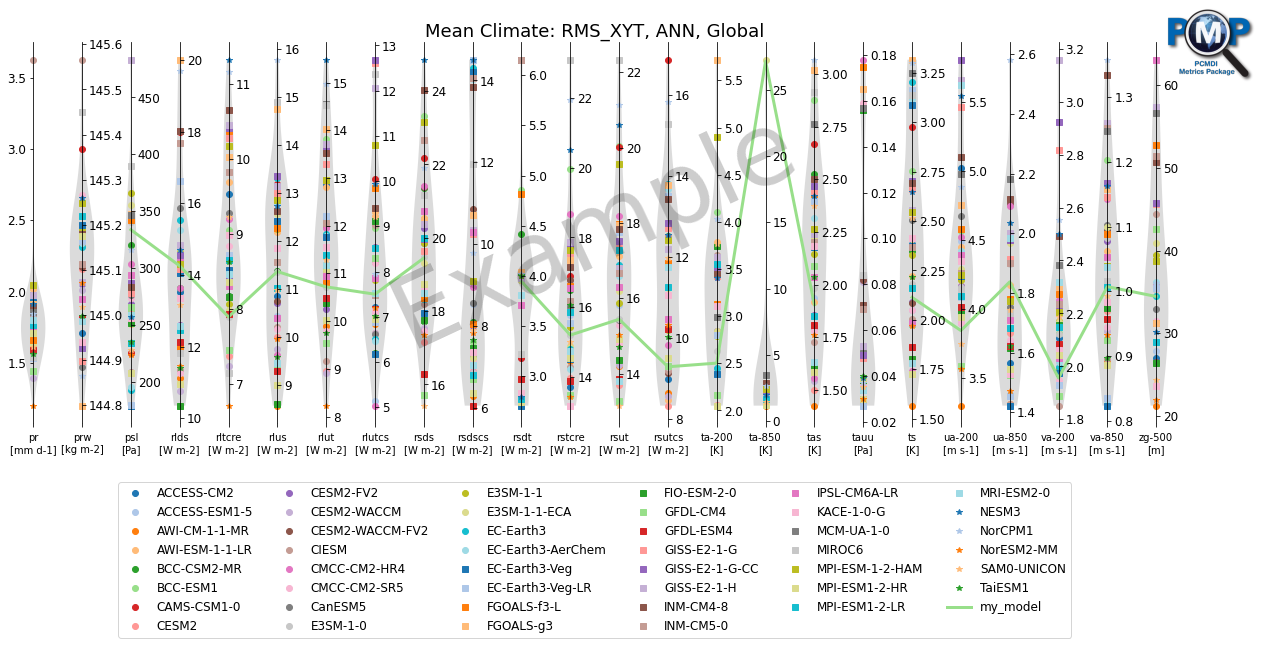

In [27]:
fig, ax = parallel_coordinate_plot(data, metric_names, model_names, model_highlights, 
                                   title='Mean Climate: RMS_XYT, ANN, Global', 
                                   figsize=(21, 7),
                                   colormap='tab20',
                                   show_boxplot=False,
                                   xtick_labelsize=10,
                                   logo_rect=[0.8, 0.8, 0.15, 0.15])
#fig.text(0.99, -0.45, 'Data version\n'+data_version, transform=ax.transAxes,
#         fontsize=12, color='black', alpha=0.6, ha='right', va='bottom',)

# Add Watermark
ax.text(0.5, 0.5, 'Example', transform=ax.transAxes,
        fontsize=100, color='black', alpha=0.2,
        ha='center', va='center', rotation='25')

In [28]:
# Save figure as an image file
fig.savefig('mean_clim_parallel_coordinate_plot_example_user_model.png', facecolor='w', bbox_inches='tight')

## 4. Box plots <a name="box"></a>

Generate a set of box plots using [`matplotlib`](https://matplotlib.org/) and [`pandas.DataFrame.boxplot`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.boxplot.html).

Note: The box extends from the first quartile (Q1) to the third quartile (Q3) of the data, with a line at the median. The whiskers extend from the box by 1.5x the inter-quartile range (IQR). Flier points are those past the end of the whiskers. See https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.pyplot.boxplot.html and https://en.wikipedia.org/wiki/Box_plot for reference.

In [29]:
stat = 'rms_xyt'
season = 'ann'
region = 'global'

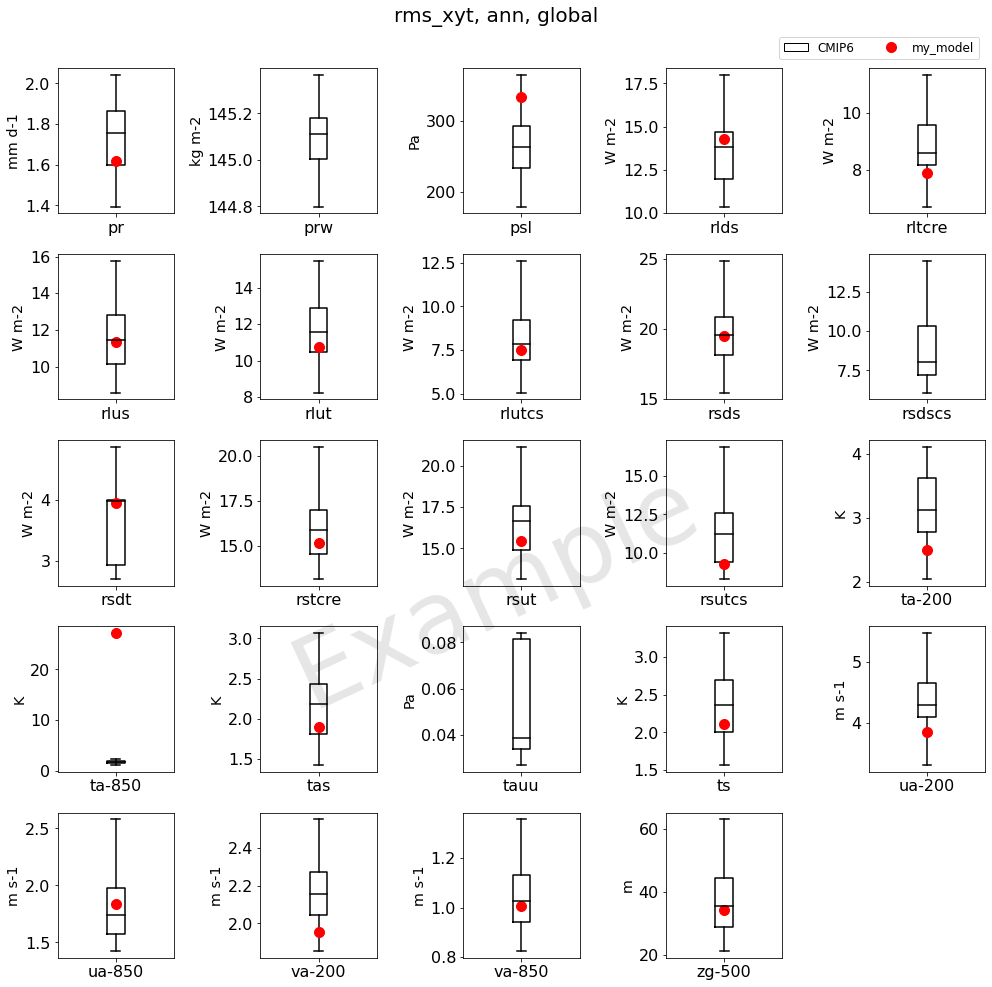

In [30]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import math

fig = plt.figure(figsize=(14,14))

ncols = 5
nrows = int(math.ceil(len(var_list)/ncols))

for index, var in enumerate(var_list):
    fig.add_subplot(nrows, ncols, index+1)
    # Box plot for library (i.e., CMIP6 models)
    ax = library.df_dict[stat][season][region].boxplot(
        [var],
        # Customize box plot
        grid=False, fontsize=16,
        color=dict(boxes='black', whiskers='black', medians='black', caps='black'),
        boxprops=dict(linestyle='-', linewidth=1.5),
        flierprops=dict(linestyle='-', linewidth=1.5),
        medianprops=dict(linestyle='-', linewidth=1.5, color='black'),
        whiskerprops=dict(linestyle='-', linewidth=1.5),
        capprops=dict(linestyle='-', linewidth=1.5),
        showfliers=False, # mute showing outliers
        rot=0,
        )
    # Add marker for test case (i.e. user models)
    try:
        my_model = test_case.df_dict[stat][season][region][var]
        ax.plot(1, my_model, 'o', c='red', markersize=10, label='my_model')
    except:
        pass
    # Show unit as y-axis label
    ax.set_ylabel(var_unit_list[index].split('[')[-1].split(']')[0])
    # Show legend at upper right corner of the figure
    if index == ncols-1:
        h, l = ax.get_legend_handles_labels()
        black_patch = mpatches.Patch(color='black', label='CMIP6', fill=False)
        ax.legend(handles= [black_patch] + h,
                  bbox_to_anchor=(1, 1.02), loc='lower right', ncol=2)
# Add Watermark
fig.text(0.5, 0.4, 'Example',
        fontsize=100, color='black', alpha=0.1,
        ha='center', va='center', rotation='25')

fig.suptitle('rms_xyt, ann, global', fontsize=20)
fig.tight_layout(pad=1.5)

In [31]:
fig.savefig('mean_clim_box_plot_example_user_model.png', facecolor='w', bbox_inches='tight')

## 5. Taylor Diagram <a name="taylor"></a>

In [32]:
from pcmdi_metrics.graphics import TaylorDiagram

Usage of `TaylorDiagram` function:

Parameters
----------
    stddev : numpy.ndarray
        an array of standard deviations
    corrcoeff : numpy.ndarray
        an array of correlation coefficients
    refstd : float
        the reference standard deviation
    fig : matplotlib figure
        the matplotlib figure
    colors : array
        an array of colors for each element of the input arrays
    normalize : bool, optional
        disable to skip normalization of the standard deviation
    labels : list, optional
        list of text for labels
    markers : list, optional
        list of marker type
    markersizes : list, optional
        list of integer for marker size
    zorders : list, optional
        list of integer for zorder
    ref_label : str, optional
        label for reference data
    smax : int or float, optional
        maximum of axis range for (normalized) standard deviation

Return
------
    fig : matplotlib figure
        the matplotlib figure
    ax : matplotlib axis
        the matplotlib axis

Select variabile, season, and region for Taylor Diagram

In [33]:
var = "ts"
season = "djf"
region = "global"

### 5.1 Identify all models <a name="taylor_all"></a>

Text(0.5, 0.4, 'Example')

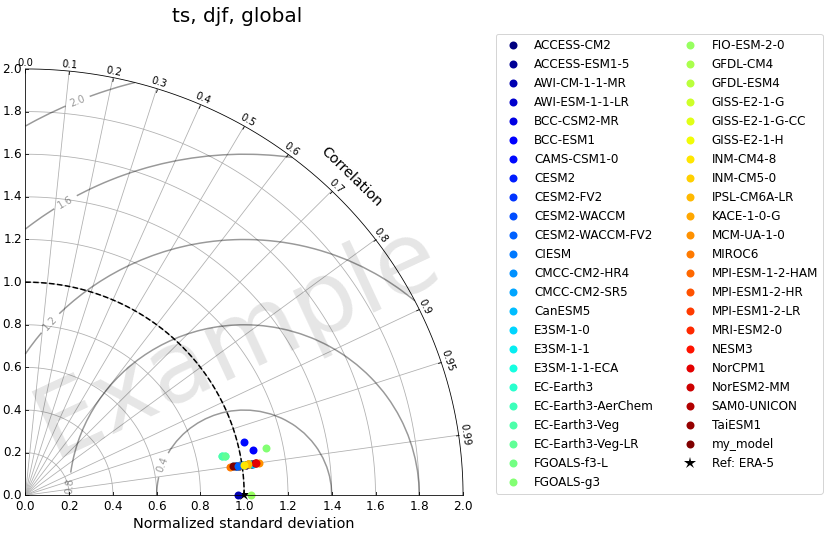

In [34]:
fig = plt.figure(figsize=(8,8))

stddev = combined.df_dict["std_xy"][season][region][var].to_numpy()
refstd = combined.df_dict['std-obs_xy'][season][region][var][0]
corrcoeff = combined.df_dict["cor_xy"][season][region][var].to_numpy()
models = combined.df_dict["cor_xy"][season][region]['model'].to_list()

colors = plt.matplotlib.cm.jet(np.linspace(0, 1, len(models)))

fig, ax = TaylorDiagram(stddev, corrcoeff, refstd, fig, colors, normalize=True, labels=models, ref_label='Ref: '+var_ref_dict[var])

ax.legend(bbox_to_anchor=(1.05, 0), loc='lower left', ncol=2)
fig.suptitle(', '.join([var, season, region]), fontsize=20)

# Add Watermark
fig.text(0.5, 0.4, 'Example',
        fontsize=100, color='black', alpha=0.1,
        ha='center', va='center', rotation='25')

### 5.2 Highlight user's model <a name="taylor_user"></a>

Text(0.5, 0.4, 'Example')

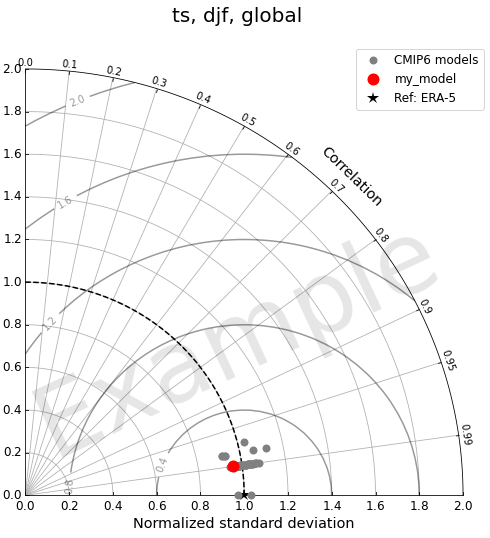

In [35]:
fig = plt.figure(figsize=(8,8))

# Customize plot to highlight user's model in red, others in grey
colors = list()
labels = list()
markers = list()
markersizes = list()
zorders = list()
for i, model in enumerate(models):
    if i == len(models)-1:
        labels.append(model)
        colors.append('red')
        markers.append('o')
        markersizes.append(12)
        zorders.append(100)
    else:
        if i == 0:
            labels.append('CMIP6 models')
        else:
            labels.append(None)
        colors.append('grey')
        markersizes.append(8)
        markers.append('o')
        zorders.append(10)
    
fig, ax = TaylorDiagram(stddev, corrcoeff, refstd, fig, colors, normalize=True, 
                        labels=labels, markers=markers, 
                        markersizes=markersizes, zorders=zorders, ref_label='Ref: '+var_ref_dict[var])

ax.legend(bbox_to_anchor=(1.05, 1.05), loc='upper right', ncol=1)
fig.suptitle(', '.join([var, season, region]), fontsize=20)

# Add Watermark
fig.text(0.5, 0.4, 'Example',
        fontsize=100, color='black', alpha=0.1,
        ha='center', va='center', rotation='25')

In [36]:
fig.savefig('mean_clim_taylor_diagram_example_user_model.png', facecolor='w', bbox_inches='tight')